# Time series analysis by Washim Ahmed
### This will let you know whether to purchase Hindustan Petrolium stock in next 10 mins or not

### 1. Import necessary libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams["figure.figsize"] = (20,10)

### 2. Data preparation
Give csv path which is readily available for you.

In [20]:
source = pd.read_csv("stockheartbeat.csv");
source.head()

,year,month,day,hour,minute,second,bse_open,bse_volume,bse_close,nse_open,nse_volume,nse_close
0,2017,4,26,12,30,2,561.0,60442,551.95,560.0,1861162,551.05
1,2017,4,26,12,40,2,561.0,67940,550.20,560.0,1935163,549.60
2,2017,4,26,12,50,2,561.0,77616,547.90,560.0,2065331,547.75
3,2017,4,26,13,0,3,561.0,81889,546.80,560.0,2134117,546.70
4,2017,4,26,13,10,2,561.0,85090,545.20,560.0,2323687,544.95


In [21]:
df = source[["bse_close"]]
df.head()

,bse_close
0,551.95
1,550.20
2,547.90
3,546.80
4,545.20


### 3. Plot visualization

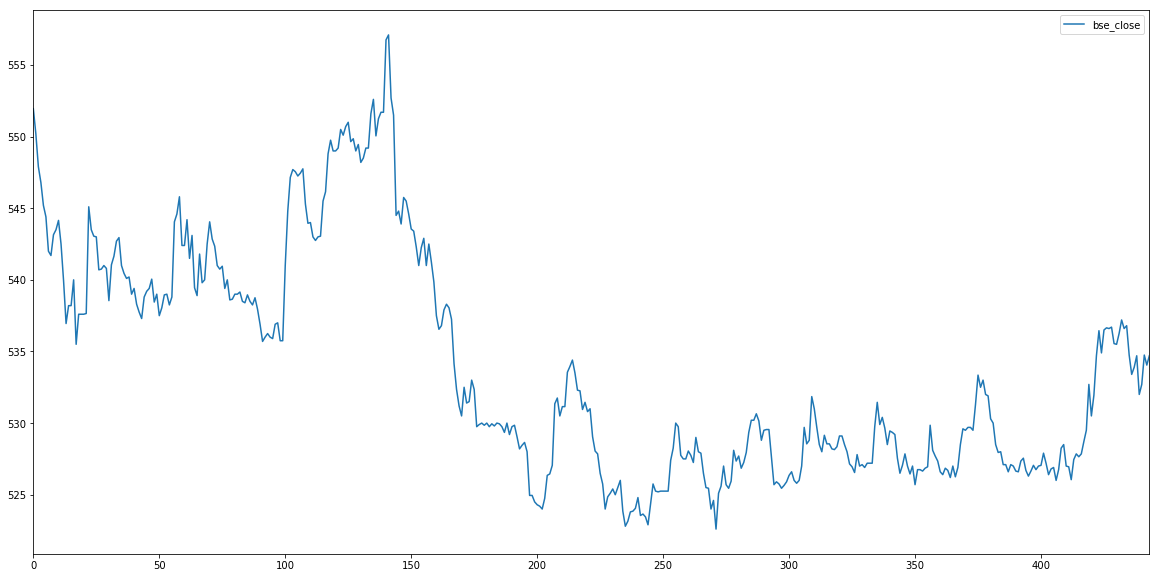

In [18]:
df.plot()
plt.show()

### 4. Dickey-Fuller test(Choosing d)
I'm trying to identify whether the series is stationary or I need to convert this as stationary.

In [28]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return pd.Series(diff)

In [29]:
stationary = difference(df["bse_close"].values)

In [31]:
stationary[0:10]

0   -1.75
1   -2.30
2   -1.10
3   -1.60
4   -0.80
5   -2.40
6   -0.30
7    1.45
8    0.35
9    0.65
dtype: float64

In [34]:
result = adfuller(stationary)

In [39]:
print("ADF Statistics: %f " % result[0])
print("P-value: %f " % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("%s: %.3f: " % (key, value))

ADF Statistics: -20.323529 
P-value: 0.000000 
Critical Values:
5%: -2.868: 
1%: -3.445: 
10%: -2.570: 


Above statistics clearly indicate that its a stationary and does not have time dependent structure. This suggests that at least one level of differencing is required. **The d parameter in our ARIMA model should at least be a value of 1**

### 5. Choosing AR and MA model

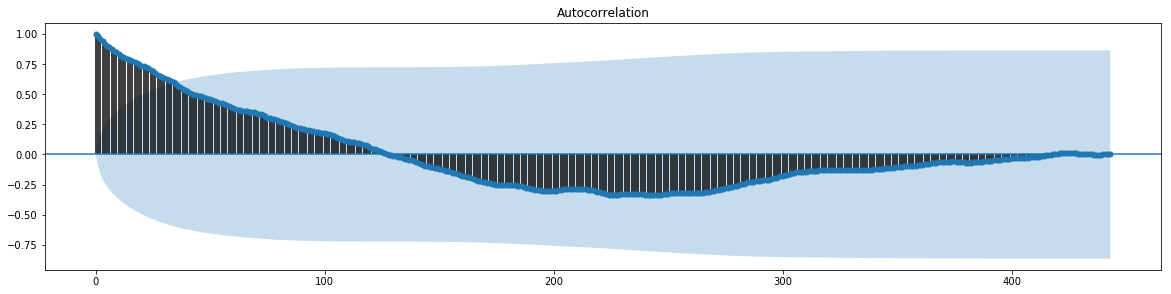

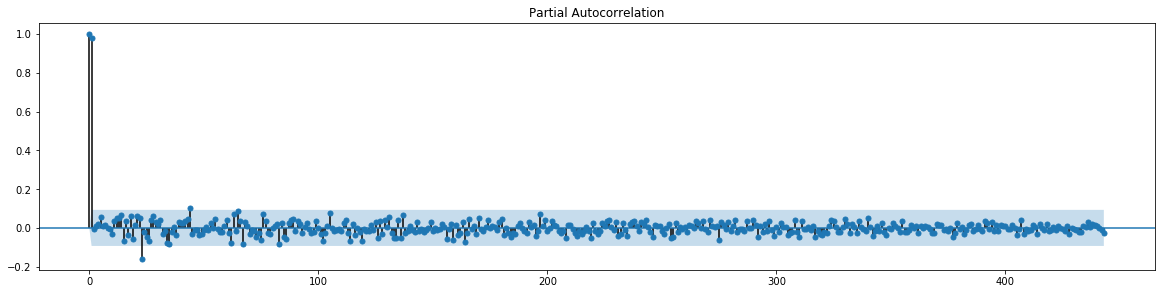

In [43]:
plt.figure()
plt.subplot(211)
plot_acf(pd.Series(df["bse_close"].values), ax=plt.gca())
plt.figure()
plt.subplot(212)
plot_pacf(pd.Series(df["bse_close"].values), ax=plt.gca())
plt.show()

OMG :) very hard to identify, need microsocope :)
1. The ACF shows a significant lag between 20 to 30
2. The PACF shows a significant lag for me 2 but not sure.